# Introduction

<p style="font:times">“If intelligence is a cake, the bulk of the cake is unsupervised learning.”</p>

Different from classification and sequence labeling, clustering divides data into several categories, or called 'clusters', only based on relationships inside the data set itself. Thus, it is a common but efficient way to explore the structure of data.

Among all the clustering algorithms, Kmeans is mostly used due to its simplicity and intuitiveness. As an iterative algorithm, Kmeans partitions data set into K subgroups. The main idea of Kmeans is to maximize in-cluster similarity and minimize cross-cluster similarity. It is one of the top 10 data mining algorithms and only 2 of the 10 are unsupervised. Thus, Kmeans is a proper but also important place to start.

The outline of this article is:
* How does Kmeans work?
    * A taste of Kmeans clustering: 1D and 2D clustering
    * Raise the number of dimensions: Image compression
* Drawbacks of Kmeans and Improvement
    * For initial points: Kmeans ++
    * For outliers: K-median and K-medoids
* Diversity in Ecommerce with Kmeans
    * A proper clustered result
    * Features for clustering
* Summary

# How does K-means work?

As I mentioned before, K-means is simple and intuitive. Before showing some math and code, here is a short story to illustrate how Kmeans works. 

![lemonade.jpeg](Latex&image/lemonade.jpeg)

In a city, there is a popular lemonade shop that has three stands. In the beginning, they randomly picked 3 locations. However, since their locations are randomly picked, some customers need to drive a long way for a cup. While some stand is too far away that nobody goes to. Facing this problem, the three stands are relocated to make sure the current customers of each stand have equal distance. After relation, however, some customers belonging to stand 1 find that stand 2 is even closer and decided to go to stand 2 for lemonade. Again, after each customer rechooses their stands, the unbalanced situation comes again. Thue, these stands relocated again and again based on the distance. Finally, they realized that they don't need to relocate anymore since every customer finds their closest stands.

See, the Mechanism of Kmeans sounds very intuitive. Here are the steps:

1. Randomly pick k unique points as initial centroids.
2. Calculate the distance between all points and each centroid, and assign every point to its nearest centroid, forming k clusters.
3. Inside each cluster, calculate the mean of all points as the new centroids. This centroid is not necessarily one of the points in the data.
4. Repeat steps 2 and 3 until reaching the maximum number of iterations, or the centroid doesn't change anymore.


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from PIL import Image
from skimage.io import imread

import re
import jieba
import string

%run kmeans

## A taste of Kmeans clustering: 1D and 2D clustering

Let's start with a simple 1D example. The situation is that we have 20 students' grades, and we want to divide them into 3 groups. The plots below show the result of K-means, and the orange marks denoted the final centroids. 

In [2]:
grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 79.78, 83.32,
          92.86, 85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03, 80.7, 88.84]
grades = np.array(grades).reshape(-1,1)
centroids, labels = kmeans(grades, k=3)

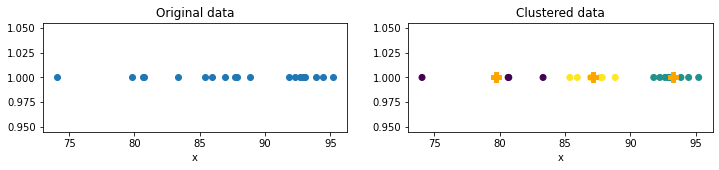

In [3]:
fig, ax = plt.subplots(1,2,figsize=(12,2))
ax[0].scatter(grades, np.ones(len(grades)))
ax[0].set_title('Original data')
ax[0].set_xlabel('x')

ax[1].scatter(grades, np.ones(len(grades)), c=labels)
ax[1].scatter(centroids, np.ones(len(centroids)), marker="P", c='orange', s=100)
ax[1].set_title('Clustered data')
ax[1].set_xlabel('x')
plt.show()

The above graph shows the scatter plot of grades data colored by the cluster they belong to. In this example, we choose K = 3. The symbol '+' is the centroid of each cluster. Looks great, isn't it? Let's see how it works in 2D. 

In [4]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=200, centers=5, cluster_std=1, random_state=0)
k = 5
centroids, labels = kmeans(x, k)

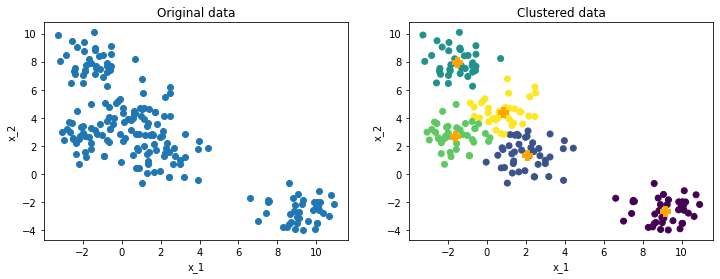

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(x[:,0], x[:,1])
ax[0].set_title('Original data')
ax[0].set_xlabel('x_1')
ax[0].set_ylabel('x_2')
ax[1].scatter(x[:,0], x[:,1], c=labels)
ax[1].scatter(centroids[:,0], centroids[:,1], marker="P", c='orange',s=100)
ax[1].set_title('Clustered data')
ax[1].set_xlabel('x_1')
ax[1].set_ylabel('x_2')
plt.show()

The original data are generated with 5 centers and ambiguous boundaries can be detected. With K=5, the clustered data clearly demonstrated the group pattern. The next plot shows how centroids changes step by step.

In [ ]:
centroids, labels, centroids_list, labels_list, cluster_list = kmeans_steps(x, k)

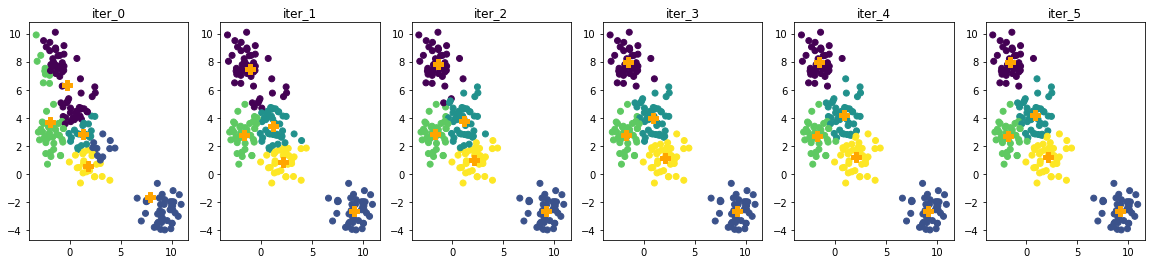

In [12]:
fig, ax = plt.subplots(1,len(centroids_list),figsize=(20,4))
ax = ax.flatten()
for i in range(0, len(centroids_list)): 
    ax[i].scatter(x[:,0], x[:,1], c=labels_list[i])
    ax[i].scatter(centroids_list[i][:,0], centroids_list[i][:,1], marker="P", c='orange', s=100)
    ax[i].set_title('iter_{}'.format(i))
plt.show()

Since the dataset is considered simple, Kmeans converges in 6 iterations. Actually, after the second iteration, the centroids barely changed.

With this dataset, the main idea of similarity can be shown by computing the distance in-cluster and cross-cluster as the following plot.

In [14]:
in_group, cross_group = in_cross_dist(cluster_list)

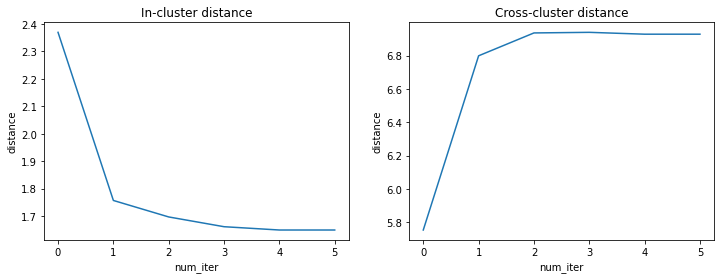

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(in_group)
ax[0].set_title('In-cluster distance')
ax[0].set_xlabel('num_iter')
ax[0].set_ylabel('distance')
ax[1].plot(cross_group)
ax[1].set_title('Cross-cluster distance')
ax[1].set_xlabel('num_iter')
ax[1].set_ylabel('distance')
plt.show()

Clearly, the in-cluster distance or dissimilarity decreases dramatically, and cross-cluster acts in the opposite way. This change consists of what the iteration plots show after iteration 2.  

## Raise the number of dimensions: Image compression

The clustering idea can also be used on image compression. Kmeans clustering will group similar colors together, and use each cluster's centroid to replace all the color vectors in respective clusters. By applying Kmeans on pixel vectors, the image can be compressed without degrading its quality. 

I am going to use my dear Amy's lovely photo for example.

In [8]:
img = imread("Latex&image/Amy_gray.jpg")

s = time()
centroids, labels = kmeans(img.reshape(-1, 1), k = 8, 
                           centroids='kmeans++', tolerance=.01)
print('time in sec:', time()-s)

centroids = centroids.astype(np.uint8)
img_ = Image.fromarray(centroids[labels].reshape(img.shape), 'L')

time in sec: 17.4126238822937


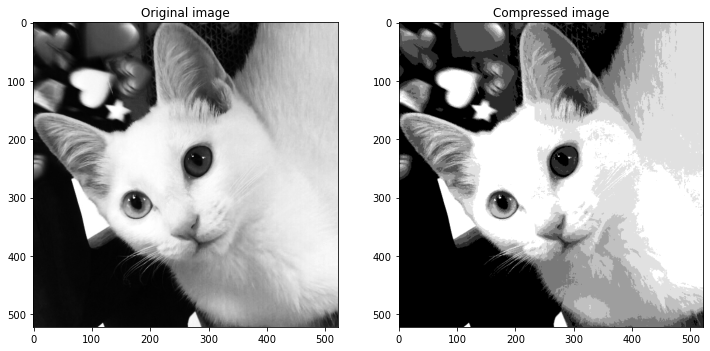

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(img_, cmap='gray')
ax[1].set_title('Compressed image')
plt.show()

The grayscale picture only has 2 dimensions. With K=8, Different gray colors are grouped into 8 clusters and replaced with each centroid color value.

In [19]:
img = imread("Latex&image/Amy.jpg")

s = time()
centroids, labels = kmeans(img.reshape(-1, 1), k=16, 
                           centroids='kmeans++', max_iter=30)
print('time in sec:', time()-s)

centroids = centroids.astype(np.uint8)
img_ = Image.fromarray(centroids[labels].reshape(img.shape))

time in sec: 132.31976985931396


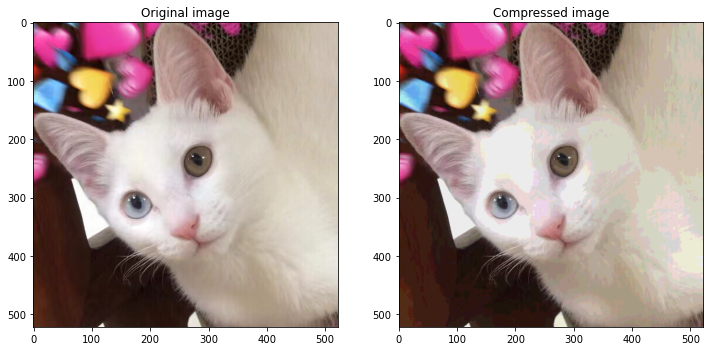

In [20]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(img_)
ax[1].set_title('Compressed image')
plt.show()

The color photo has 3 dimensions, takes a relatively long time to be processed. Same as before, color vectors are replaced by the centroid of the cluster they belong to.

# Drawbacks of Kmeans and Improvement

Viewing how powerful K-means can be, it is also important to know some drawbacks and corresponding improvements.

## For initial points: Kmeans ++
The first drawback is how to pick the initial points. The plots below show how clustering results change with different initial centroids.

In [240]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=200, centers=5, cluster_std=1, random_state=0)
k = 5
centroids1, labels1 = kmeans(x, k)
centroids2, labels2 = kmeans(x, k)
centroids3, labels3 = kmeans(x, k)

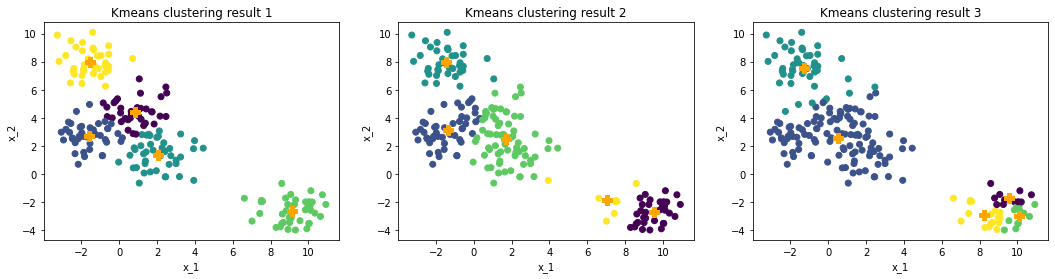

In [241]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
ax[0].scatter(x[:,0], x[:,1], c=labels1)
ax[0].scatter(centroids1[:,0], centroids1[:,1], marker="P", c='orange', s=100)
ax[0].set_title('Kmeans clustering result 1')
ax[0].set_xlabel('x_1')
ax[0].set_ylabel('x_2')

ax[1].scatter(x[:,0], x[:,1], c=labels2)
ax[1].scatter(centroids2[:,0], centroids2[:,1], marker="P", c='orange', s=100)
ax[1].set_title('Kmeans clustering result 2')
ax[1].set_xlabel('x_1')
ax[1].set_ylabel('x_2')


ax[2].scatter(x[:,0], x[:,1], c=labels3)
ax[2].scatter(centroids3[:,0], centroids3[:,1], marker="P", c='orange', s=100)
ax[2].set_title('Kmeans clustering result 3')
ax[2].set_xlabel('x_1')
ax[2].set_ylabel('x_2')

plt.show()

From the plot, the right lower corner of each plot has a different number of cluster centroids, which leads to significantly different efficiency of clustering. Usually, because of ambiguous boundaries of data or extremely large datasets, we are lacking criteria for judging how clustering algorithm works, which makes this drawback even worse.

A common solution of initial points is called Kmeans++, which chooses the initial points by distance. Here is how it works:

1. Pick one random point in the data as the first centroid.
2. Calculate the distance between the first centroid and other points, and pick the farthest points as the second centroid.
3. Repeat step2 to find another point that is the farthest from the former two centroids.
4. Repeat until finding K points.

Then we use these K points as the initial centroids for Kmeans. The following plots show the result of Kmeans++.

In [10]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=200, centers=5, cluster_std=1, random_state=0)
k = 5
centroids1, labels1 = kmeans(x, k, 'kmeans++')
centroids2, labels2 = kmeans(x, k, 'kmeans++')
centroids3, labels3 = kmeans(x, k, 'kmeans++')

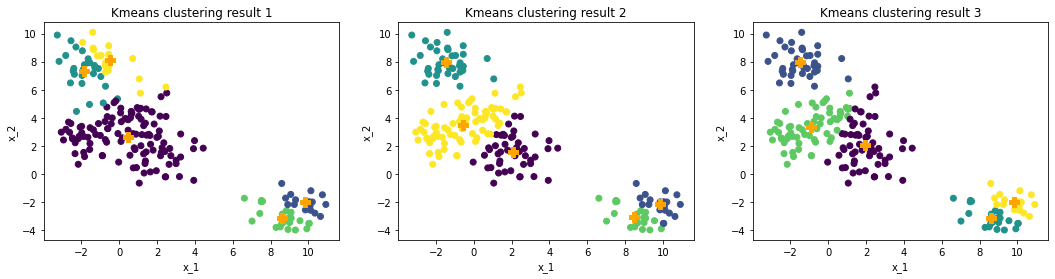

In [11]:
fig, ax = plt.subplots(1,3,figsize=(18,4))
ax[0].scatter(x[:,0], x[:,1], c=labels1)
ax[0].scatter(centroids1[:,0], centroids1[:,1], marker="P", c='orange', s=100)
ax[0].set_title('Kmeans clustering result 1')
ax[0].set_xlabel('x_1')
ax[0].set_ylabel('x_2')

ax[1].scatter(x[:,0], x[:,1], c=labels2)
ax[1].scatter(centroids2[:,0], centroids2[:,1], marker="P", c='orange', s=100)
ax[1].set_title('Kmeans clustering result 2')
ax[1].set_xlabel('x_1')
ax[1].set_ylabel('x_2')


ax[2].scatter(x[:,0], x[:,1], c=labels3)
ax[2].scatter(centroids3[:,0], centroids3[:,1], marker="P", c='orange', s=100)
ax[2].set_title('Kmeans clustering result 3')
ax[2].set_xlabel('x_1')
ax[2].set_ylabel('x_2')

plt.show()

With reselected initial points, the result of K-means becomes stable, though the first random points can still somehow have an effect.


## For outliers: K-medians and K-medoids

Another obvious drawback of Kmeans is its sensitivity to outliers. This is a common problem for any algorithm that uses the mean values. The solution is also common, which is using the median. The key difference between Kmeans and Kmedians is to replace mean with median when calculating the new centroids.

In [27]:
x_outlier = np.concatenate([x, np.array([[20,20],[-10,-10]])])
centroids, labels = kmeans(x_outlier, k, 'kmeans++')

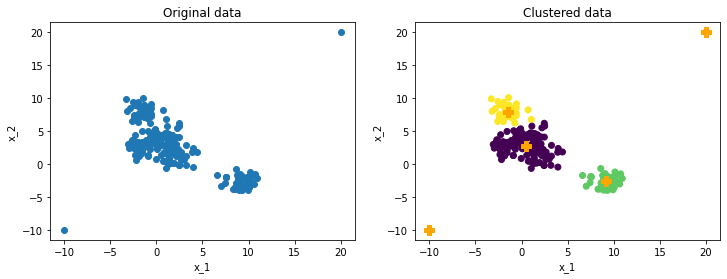

In [28]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(x_outlier[:,0], x_outlier[:,1])
ax[0].set_title('Original data')
ax[0].set_xlabel('x_1')
ax[0].set_ylabel('x_2')
ax[1].scatter(x_outlier[:,0], x_outlier[:,1], c=labels)
ax[1].scatter(centroids[:,0], centroids[:,1], marker="P", c='orange',s=100)
ax[1].set_title('Clustered data')
ax[1].set_xlabel('x_1')
ax[1].set_ylabel('x_2')
plt.show()

In [29]:
centroids_m, labels_m, _, _, _ = kmedians_steps(x_outlier, k)

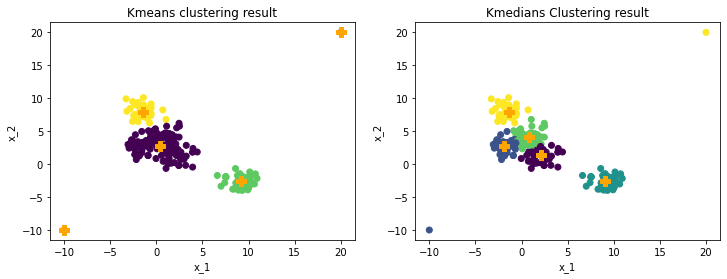

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(x_outlier[:,0], x_outlier[:,1], c=labels)
ax[0].scatter(centroids[:,0], centroids[:,1], marker="P", c='orange',s=100)
ax[0].set_title('Kmeans clustering result')
ax[0].set_xlabel('x_1')
ax[0].set_ylabel('x_2')
ax[1].scatter(x_outlier[:,0], x_outlier[:,1], c=labels_m)
ax[1].scatter(centroids_m[:,0], centroids_m[:,1], marker="P", c='orange',s=100)
ax[1].set_title('Kmedians Clustering result')
ax[1].set_xlabel('x_1')
ax[1].set_ylabel('x_2')
plt.show()

The plots above show the different performances of Kmeans and Kmedians on a data set with 2 outliers. Kmeans will treat the outliers as centroid, which reduces the clustering performance on main data. Kmedians can ignore outliers can maintain an efficient performance on main data.

Another robust method is called Kmedoids, which requires centroids must be points of data. Kmediods obtains similar performance as Kmedians.

In [34]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=5, random_state=0).fit(x_outlier)

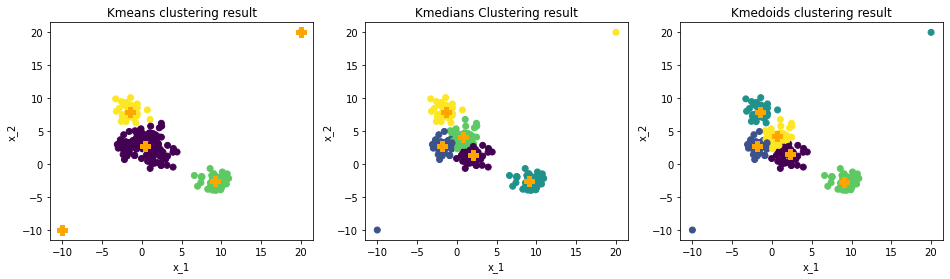

In [39]:
fig, ax = plt.subplots(1,3,figsize=(16,4))
ax[0].scatter(x_outlier[:,0], x_outlier[:,1], c=labels)
ax[0].scatter(centroids[:,0], centroids[:,1], marker="P", c='orange',s=100)
ax[0].set_title('Kmeans clustering result')
ax[0].set_xlabel('x_1')
ax[0].set_ylabel('x_2')
ax[1].scatter(x_outlier[:,0], x_outlier[:,1], c=labels_m)
ax[1].scatter(centroids_m[:,0], centroids_m[:,1], marker="P", c='orange',s=100)
ax[1].set_title('Kmedians Clustering result')
ax[1].set_xlabel('x_1')
ax[1].set_ylabel('x_2')
ax[2].scatter(x_outlier[:,0], x_outlier[:,1], c=kmedoids.labels_)
ax[2].scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], marker="P", c='orange',s=100)
ax[2].set_title('Kmedoids clustering result')
ax[2].set_xlabel('x_1')
ax[2].set_ylabel('x_2')
plt.show()

Beyond these two drawbacks, there are also other considerations that can be addressed on the clustering algorithms. For example, the difficulty to evaluate a clustering result given a large data set that cannot be grouped by humans. After clustering, extra efforts need to be spent on extracting cluster attributes to transform them into practical information.

# Diversity in Ecommerce with Clustering Algorithm

The author is lucky to work in Walmart Global Tech as a Data Scientist intern. One of the heating topics in my team's scope is diversity in the recommender systems.

Because of information overload on e-commerce platforms, extracting a small set of search of recommendation results that possesses high diversity is very helpful both to providers and customers.

The diversity defined in e-commerce is the variety of item types or product types shown to customers. One of the challenges recommendations on e-commerce platforms is facing is that the top-ranked results on the first several items cannot effectively and sufficiently reflect the diversity of all the results. There exist many types of clustering methods that have been used for e-commerce, including Kmeans based clustering methods, graph-based clustering methods, and agglomerative-based clustering methods.

Our discussion will focus on recommendation deduplication with clustering algorithms. The goal of deduplication is to use clustering algorithms to catch the similarity between top-ranked items and remove the unnecessary similar items and show more item types to customers.

There are several things that need to be considered in this process.

1. How to measure diversity?
2. What is a proper cluster?
3. Which one to remove?

## A proper clustered result
Since this article is focusing on the K-means cluster, we will skip to the second problem.

Unlike exploring an unstructured dataset, a clear description even a specific kind of label is available for each item. To cluster items, we consider the same item type should be clustered together, while the same product type should not be for deduplication.

Here is an example of a good cluster for deduplication, since there are high similarity items.
![good_cluster.png](Latex&image/good_cluster.png)

While this is not, though they are all canned fruits.
![bad_cluster.png](Latex&image/bad_cluster.png)

## Features for clustering

Though human can recognize similar items without effort, e-commerce platform usually doesn't use picture for clustering. Without extra models, item title or description is the main information we can use. 

In the following part, I am going to explore K-means' performance on Instacart product data. I just take the first 200 items for illustration. The texts are embedded using a 50D glove.

In [190]:
item_name = pd.read_csv('Insta_product.csv').sort_values('product_name').reset_index().product_name

In [89]:
d = load_glove()

Loading Glove...
Finished loading Glove.


In [194]:
item_name_vector = item_name_vector(item_name[:200], d)

In [195]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0).fit(item_name_vector)

In [199]:
result = pd.DataFrame(kmeans.labels_, columns=['label'])
result['item_name'] = item_name[:200]
result[result.label==3]

,label,item_name
167,3,100% Grape Juice
189,3,100% Juice Grape
190,3,100% Juice Grape Juice


From the result above, we can see that similarly named items are clustered together, which is a good start for deduplication. Text-based methods rely on text embedding. The number of clusters also affects how accurately certain items are grouped. Besides, other features such as detailed categorical information and features calculated based on customer behavior should also contribute to deduplication purposes.

# Summary

In this article, we demonstrated how the K-means algorithm works on 1D, 2D scatters and its implementation on image compression. We also slightly discussed how cluster algorithms can be used in product diversity on e-commerce platforms.

When implementing a certain algorithm on a real-world problem, besides the model itself, great efforts should be spent on analyzing the real situation. Clear vision on the result, and then dig into conquering each small problem.
